In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import os.path as osp
import argparse
import numpy as np
import torch
import smplx
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# %matplotlib widget
# %matplotlib inline 

In [2]:
model_folder = r'C:\Users\user\Documents\GitHub\smplx'
model_type = 'smpl'
plot_joints = 'true'
use_face_contour = False
gender = 'male'
ext = 'npz'
plotting_module = 'matplotlib'
num_betas = 10
num_expression_coeffs = 10
sample_shape = True
sample_expression = True

In [3]:
model = smplx.create(model_folder, model_type=model_type,
                         gender=gender, use_face_contour=use_face_contour,
                         num_betas=num_betas,
                         num_expression_coeffs=num_expression_coeffs,
                         ext=ext)

In [4]:
import math
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
betas = torch.randn([1, model.num_betas], dtype=torch.float32)
expression = torch.randn([1, model.num_expression_coeffs], dtype=torch.float32)

pose = torch.from_numpy((np.random.rand(69) - 0.5) * 0.4).unsqueeze(0).float()

pose=torch.zeros([1, 23 * 3], dtype=torch.float32)
# go = torch.from_numpy((np.random.rand(3) - 0.5) * 0.4).unsqueeze(0).float()
# go = torch.Tensor([0.,3.141592,0.]).unsqueeze(0).float()
go=torch.zeros([1, 3], dtype=torch.float32)

# pose_rotmat=torch.zeros([1,23,3,3],dtype=torch.float32)
# go_rotmat=torch.zeros([1,1,3,3],dtype=torch.float32)
# pose[0][0]=math.pi/4 # L_hip
# pose[0][1]=math.pi/4
# pose[0][2]=math.pi/4
# pose[0][9]=math.pi # L_Knee
# pose[0][18]=math.pi/2 # L_Ankle
# pose[0][27]=math.pi/2 # L_Foot
pose


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
import trimesh

output = model(
    global_orient=go,
    body_pose=pose,
    expression=expression,
    return_verts=True,
    # pose2rot=False
    )
# output = model(
#     betas=betas,
#     global_orient=global_orient[pose_idx],
#     body_pose=body_pose[pose_idx],
#     left_hand_pose=left_hand_pose[pose_idx],
#     right_hand_pose=right_hand_pose[pose_idx],
#     # expression=expression,
#     return_verts=True,
# )
vertices = output.vertices.detach().cpu().numpy().squeeze()
joints = output.joints.detach().cpu().numpy().squeeze()

vertex_colors = np.ones([vertices.shape[0], 4]) * [0.3, 0.3, 0.3, 0.8]
# process=False to avoid creating a new mesh
tri_mesh = trimesh.Trimesh(
    vertices, model.faces, vertex_colors=vertex_colors, process=False
)

# output_path = r'C:\Users\user\Documents\GitHub\smplx\examples\test_smpl_rotmat.obj'
# tri_mesh.export(str(output_path))

In [6]:
temp_3d_coords=output.joints.detach()
temp_3d_coords=temp_3d_coords.squeeze()
temp_3d_coords=temp_3d_coords.numpy().squeeze()

temp_3d_coords

array([[-2.17368454e-03, -2.40789175e-01,  2.85837967e-02],
       [ 5.64076751e-02, -3.23069215e-01,  1.09197106e-02],
       [-6.24834113e-02, -3.31302434e-01,  1.50412638e-02],
       [ 2.26577185e-03, -1.16385624e-01, -9.80143063e-03],
       [ 9.98590887e-02, -7.09538639e-01,  1.89567134e-02],
       [-1.05740026e-01, -7.14990318e-01,  1.01982197e-02],
       [ 6.75420463e-03,  2.15707719e-02,  1.70188975e-02],
       [ 8.50687698e-02, -1.13641310e+00, -1.84712820e-02],
       [-8.66844878e-02, -1.13503599e+00, -2.43634507e-02],
       [ 4.48963046e-03,  7.76031613e-02,  1.98739395e-02],
       [ 1.26123130e-01, -1.19669914e+00,  1.03571147e-01],
       [-1.21524356e-01, -1.19714153e+00,  1.05959840e-01],
       [-8.90056230e-03,  2.89238691e-01, -1.35936365e-02],
       [ 7.61920959e-02,  1.91602856e-01,  9.75767151e-04],
       [-7.84640238e-02,  1.90075502e-01, -3.83344479e-03],
       [ 1.21264718e-03,  3.78176033e-01,  3.68162245e-02],
       [ 1.99113488e-01,  2.36807942e-01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.06248341 -0.33130243 0.015041264


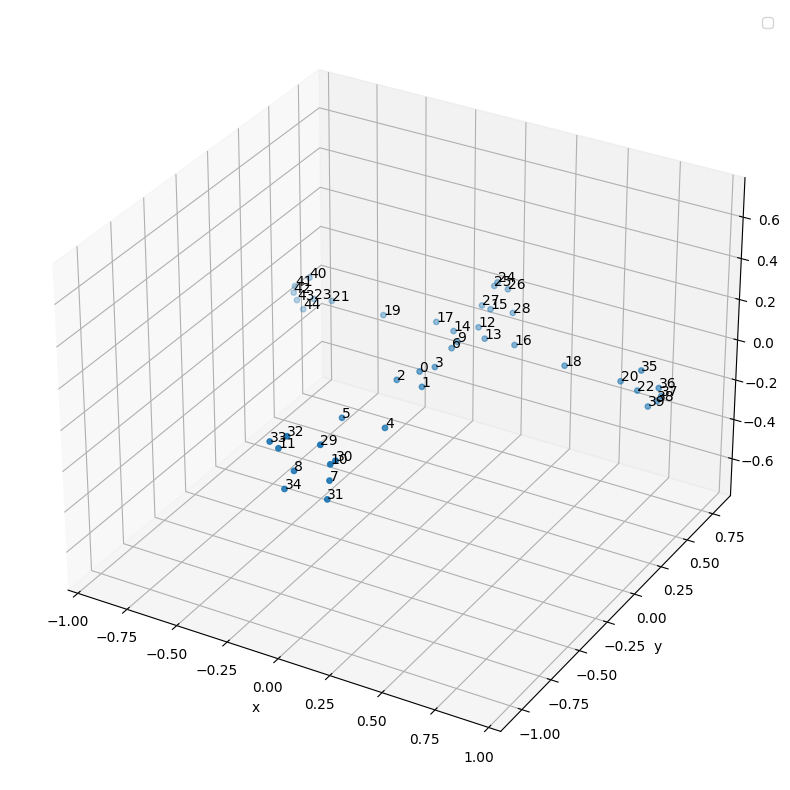

In [7]:

x=temp_3d_coords[:,0]
y=temp_3d_coords[:,1]
z=temp_3d_coords[:,2]
fig = plt.figure(figsize=(10,10))
pelvis_x=x[0]
pelvis_y=y[0]
pelvis_z=z[0]

ax = fig.add_subplot(111, projection='3d')
ax.scatter((x-pelvis_x),(y-pelvis_y),(z-pelvis_z),marker='o',s=15)
ax.set_aspect('equal')
for i,(x,y,z) in enumerate(zip(x,y,z)):
    if i==2:
        print(x,y,z)
    ax.text((x-pelvis_x),(y-pelvis_y),(z-pelvis_z),str(i))

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [8]:
from smplx.utils import Struct
import pickle

with open(r'C:\Users\user\Documents\GitHub\smplx\smplx\models\smplx\SMPLX_FEMALE.pkl','rb') as smpl_file:
    data_struct = Struct(**pickle.load(smpl_file,encoding='latin1'))
ktree=data_struct.kintree_table[0]

In [9]:
import glob 
json_path=r'F:\ego_cam_dataset\female_001_a_a\env_001\cam_down\json'
rgba_path=r'F:\ego_cam_dataset\female_001_a_a\env_001\cam_down\rgba'
depth_path=r'F:\ego_cam_dataset\female_001_a_a\env_001\cam_down\depth'
json_list=glob.glob(json_path+'/*.json')
rgba_list=glob.glob(rgba_path+'/*.png')
depth_list=glob.glob(depth_path+'/*.png')
file_num=1


In [43]:
import json
from torchvision.transforms.functional import to_pil_image

ktree=[-1,  0,  0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  9,  9, 12, 13,
        14, 16, 17, 18, 19, 15, 15, 15, 20, 25, 26, 20, 28, 29, 20, 31, 32,
        20, 34, 35, 20, 37, 38, 21, 40, 41, 21, 43, 44, 21, 46, 47, 21, 49,
        50, 21, 52, 53]
xR_2_SMPL=[2,31,61,62,27,57,63,4,34,64,29,59,0,28,58,1,3,33,5,35,6,36,11,41]
skip_num = [13, 14, 15]

def get_3d_joints(json_path):
    """
    This function get xR_ego_dataset and convert to SMPL style points.
    Input:
        json_path : ego_dataset path
    Output:
        tensor (24,3) : SMPL_style_joints
    """
    temp_json=None
    with open(json_path,'r') as f:
        temp_json=json.loads(f.read())
    joints = np.vstack([j['trans'] for j in temp_json['joints']]).T
    x=torch.tensor(joints[0])
    y=torch.tensor(joints[1])
    z=torch.tensor(joints[2])
    res=[x,y,z]
    res = torch.stack(res,0).to(torch.float32).T
    ego_pose_label = res
    
    SMPL_label=[]
    for xR_idx in xR_2_SMPL:
        if xR_idx in skip_num : continue
        SMPL_label.append(res[xR_idx])
    SMPL_label=torch.stack(SMPL_label)
    # self.temp_view(SMPL_label)
    return SMPL_label

def joint_3d_viewer(input_images, joints, labels):
    temp_input_images = input_images.clone().detach().cpu()
    temp_labels = labels.clone().detach().cpu()
    temp_joints = joints.clone().detach().cpu()
    fig,ax = plt.subplots(len(labels),3,figsize=(10,70),subplot_kw={"projection":"3d"})
    for i in range(len(labels)):
        if len(labels)!=1:
            rows, cols, start, stop = ax[i][0].get_subplotspec().get_geometry()
            ax[i][0].remove()
            ax[i][0] = fig.add_subplot(rows,cols,start+1)
        rows, cols, start, stop = ax[0].get_subplotspec().get_geometry()
        ax[0].remove()
        ax[0] = fig.add_subplot(rows,cols,start+1)
    
    for i,(input_image, joint, label) in enumerate(zip(temp_input_images, temp_joints, temp_labels)):
        input_image=to_pil_image(input_image)

        # SMPL joints line plot
        for j in reversed(range(22)):
            if not j:break
            if j in skip_num : continue
            pred_joint_line_x=[joint[j,0],joint[ktree[j],0]]
            pred_joint_line_y=[joint[j,1],joint[ktree[j],1]]
            pred_joint_line_z=[joint[j,2],joint[ktree[j],2]]
            label_joint_line_x=[label[j,0],label[ktree[j],0]]
            label_joint_line_y=[label[j,1],label[ktree[j],1]]
            label_joint_line_z=[label[j,2],label[ktree[j],2]] 
            ax[1].plot(pred_joint_line_x, pred_joint_line_y, pred_joint_line_z)
            ax[2].plot(label_joint_line_x,label_joint_line_y, label_joint_line_z)
        
        ax[0].set_aspect('equal')
        ax[1].set_aspect('equal')
        ax[2].set_aspect('equal')
        ax[1].view_init(120,-120,-30)
        ax[2].view_init(120,-120,-30)
        ax[1].set_xlabel('x')
        ax[1].set_ylabel('y')
        ax[1].set_zlabel('z')
        ax[2].set_ylabel('y')
        ax[2].set_xlabel('x')
        ax[2].set_zlabel('z')


        ax[0].imshow(input_image)

        # ax[i][0].set_title(info.split('\\')[3]+info.split('\\')[-1])
        ax[1].set_title('pred_3d_joint')
        ax[2].set_title('3d_joint_GT')

    return fig


In [11]:

import cv2
import torchvision.transforms as transforms
from PIL import Image

def get_rgba(img_path,resize=(512,512)):
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h,w,c = img.shape
    c_h,c_w = h//2,w//2
    radius = min(c_h,c_w) + 100
    mask = np.zeros_like(img)
    cv2.circle(mask, (c_w,c_h), radius, (255, 255, 255), -1)
    cropped_img = cv2.bitwise_and(img, mask)
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(resize, Image.BILINEAR),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    return transform(cropped_img)


In [38]:
procrustes={
    'rotation': torch.tensor([[ 0.9999647 , -0.00426632,  0.00723915],
                                [ 0.00411011,  0.99976134,  0.02145697],
                                [-0.00732896, -0.02142646,  0.9997435 ]]).T.to(device),
    'scale': 92.3,
    'translation': torch.tensor([  0.9100, 115.3339,  -2.7504]).to(device)
    }

pred_joints = output.joints[:,:24,:].clone().detach()
pred_joints = torch.einsum('bij,kj->bik',pred_joints.to('cuda'),procrustes['rotation'])
pred_joints *= procrustes['scale']
pred_joints += procrustes['translation']
# pred_joints = pred_joints.squeeze(0)


In [39]:
label_joint = get_3d_joints(json_list[file_num]).unsqueeze(0)
print(label_joint)
SMPL_joint = pred_joints.cpu()
print(pred_joints)
input_img = get_rgba(rgba_list[file_num]).unsqueeze(0)
print(label_joint.shape,SMPL_joint.shape,input_img.shape)

tensor([[[  0.9340,  92.8421,  -4.3434],
         [  8.5825,  87.6405,  -3.1220],
         [ -6.7197,  87.6498,  -3.5811],
         [  0.9397, 102.1915,  -4.4137],
         [ 14.7245,  48.3983,  -1.2808],
         [-13.5343,  48.5084,  -2.9717],
         [  0.9460, 113.0991,  -4.4957],
         [ 19.1308,  10.0892,  -8.0231],
         [-18.6048,   9.9551,  -5.4364],
         [  0.9533, 125.5650,  -4.5894],
         [ 18.3316,   2.1875,   4.1138],
         [-17.8150,   2.0188,   6.2697],
         [  0.9874, 145.1261,  -2.9866],
         [  6.4881, 137.7108,  -4.5127],
         [ -4.5673, 137.7172,  -4.8764],
         [  1.1422, 166.1220,   3.5596],
         [ 17.3121, 133.7960,  -4.1481],
         [-15.3959, 133.8151,  -5.2395],
         [ 38.2223, 133.7704,  -4.1811],
         [-36.3489, 133.7860,  -5.1677],
         [ 61.7856, 133.7960,  -4.1448],
         [-59.9138, 133.7868,  -5.0709],
         [ 74.3724, 133.7982,  -4.1130],
         [-71.7607, 133.7681,  -5.0108]]])
tensor([[[  0.

C:\Users\user\AppData\Local\Temp\ipykernel_23956\2112316452.py:16: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  transforms.Resize(resize, Image.BILINEAR),
c:\Users\user\anaconda3\envs\smplx\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


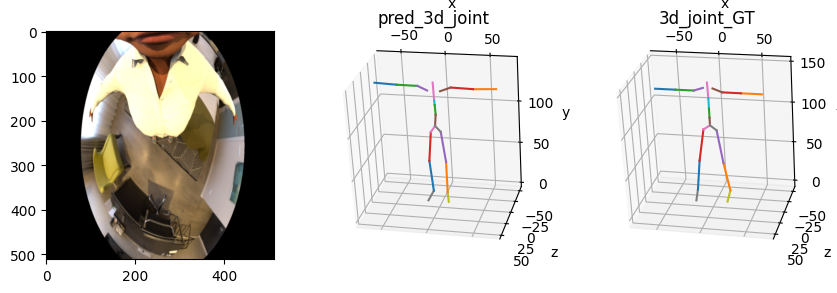

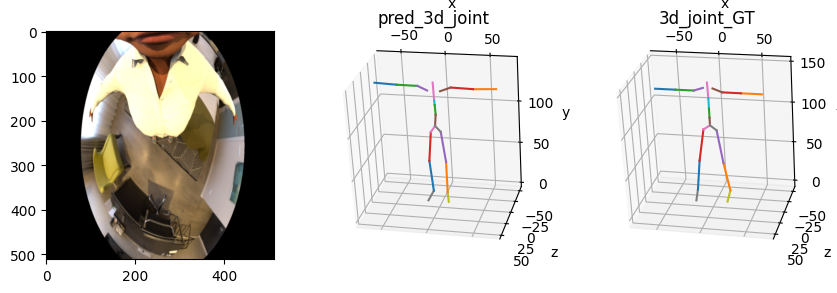

In [44]:
joint_3d_viewer(input_images=input_img,
                joints=SMPL_joint,
                labels=label_joint)

In [29]:
def procrustes(X, Y, scaling=True, reflection='best'):
    n,m = X.shape
    ny,my = Y.shape

    muX = X.mean(0)
    muY = Y.mean(0)

    X0 = X - muX
    Y0 = Y - muY

    ssX = (X0**2.).sum()
    ssY = (Y0**2.).sum()

    # centred Frobenius norm
    normX = np.sqrt(ssX)
    normY = np.sqrt(ssY)

    # scale to equal (unit) norm
    X0 /= normX
    Y0 /= normY

    if my < m:
        Y0 = np.concatenate((Y0, np.zeros(n, m-my)),0)

    # optimum rotation matrix of Y
    A = np.dot(X0.T, Y0)
    U,s,Vt = np.linalg.svd(A,full_matrices=False)
    V = Vt.T
    T = np.dot(V, U.T)

    if reflection != 'best':

        # does the current solution use a reflection?
        have_reflection = np.linalg.det(T) < 0

        # if that's not what was specified, force another reflection
        if reflection != have_reflection:
            V[:,-1] *= -1
            s[-1] *= -1
            T = np.dot(V, U.T)

    traceTA = s.sum()

    if scaling:

        # optimum scaling of Y
        b = traceTA * normX / normY

        # standarised distance between X and b*Y*T + c
        d = 1 - traceTA**2

        # transformed coords
        Z = normX*traceTA*np.dot(Y0, T) + muX

    else:
        b = 1
        d = 1 + ssY/ssX - 2 * traceTA * normY / normX
        Z = normY*np.dot(Y0, T) + muX

    # transformation matrix
    if my < m:
        T = T[:my,:]
    c = muX - b*np.dot(muY, T)
    
    #transformation values 
    tform = {'rotation':T, 'scale':b, 'translation':c}
   
    return d, Z, tform

In [34]:
converted_xr, converted_smpl, tform = procrustes(label_joint.squeeze(0), output.joints[:,:24,:].clone().detach().squeeze(0))
tform

{'rotation': array([[ 0.9999647 , -0.00426632,  0.00723915],
        [ 0.00411011,  0.99976134,  0.02145697],
        [-0.00732896, -0.02142646,  0.9997435 ]], dtype=float32),
 'scale': tensor(92.2959),
 'translation': tensor([  0.9100, 115.3339,  -2.7504])}